In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
# ====== 2. Load data ======
# Jika Anda pakai dataset Kaggle official, gunakan path berikut (jika tidak, ganti path ke file CSV Anda)
DATA_PATH = '/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(DATA_PATH)

# Cetak info singkat
print("Shape:", df.shape)


Shape: (7043, 21)


# EDA

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Perbaikan data TotalCharges (String kosong jadi NaN lalu convert ke Float)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
# Statistik Deskriptif
print("\n=== Statistik Deskriptif ===")
display(df.describe())


=== Statistik Deskriptif ===


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Missing values

In [7]:
# Persentase Missing Value
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

# Buat DataFrame
missing_df = pd.DataFrame({
    'Jumlah Hilang': missing_count,
    'Persentase (%)': missing_percent
})

print("\n=== Tabel Missing Value (Semua Kolom) ===")
print(missing_df)


=== Tabel Missing Value (Semua Kolom) ===
                  Jumlah Hilang  Persentase (%)
customerID                    0        0.000000
gender                        0        0.000000
SeniorCitizen                 0        0.000000
Partner                       0        0.000000
Dependents                    0        0.000000
tenure                        0        0.000000
PhoneService                  0        0.000000
MultipleLines                 0        0.000000
InternetService               0        0.000000
OnlineSecurity                0        0.000000
OnlineBackup                  0        0.000000
DeviceProtection              0        0.000000
TechSupport                   0        0.000000
StreamingTV                   0        0.000000
StreamingMovies               0        0.000000
Contract                      0        0.000000
PaperlessBilling              0        0.000000
PaymentMethod                 0        0.000000
MonthlyCharges                0        0.0000

## Visualisasi missing value

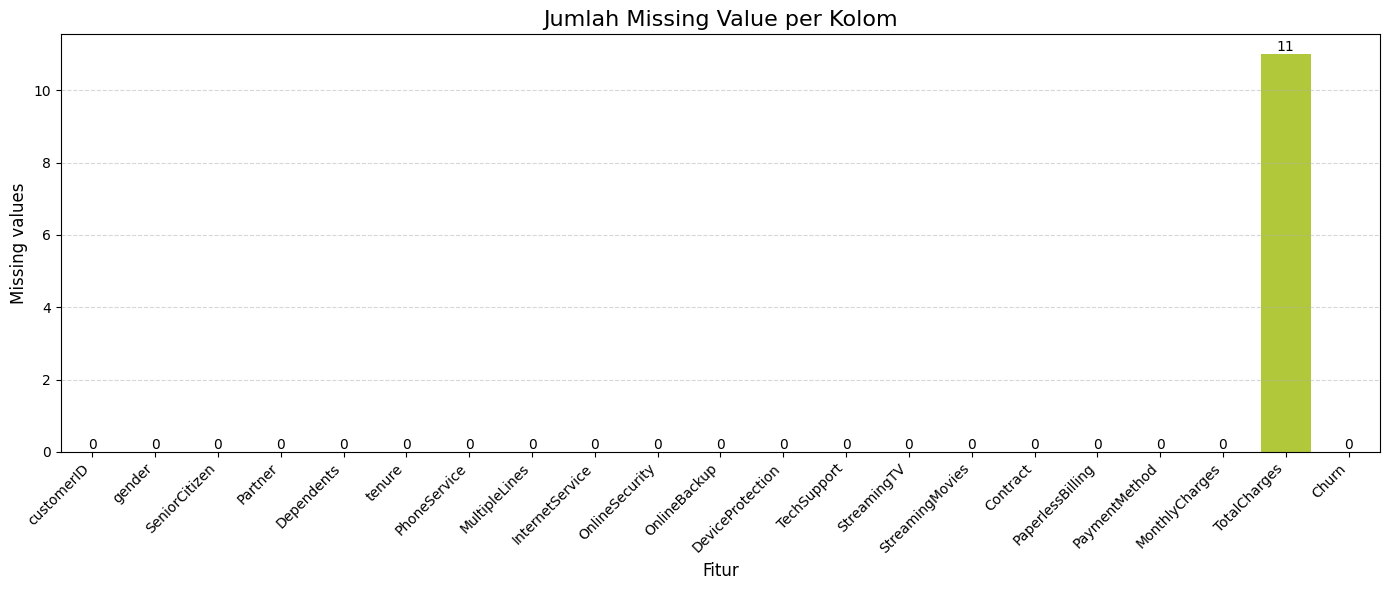

In [8]:
# Visualisasi 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
# Plot data
ax = sns.barplot(x=missing_count.index, y=missing_count.values, palette='viridis')

plt.title('Jumlah Missing Value per Kolom', fontsize=16)
plt.ylabel('Missing values', fontsize=12)
plt.xlabel('Fitur', fontsize=12)
plt.xticks(rotation=45, ha='right') # Memutar label agar terbaca
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Menambahkan label angka di atas batang
for i in ax.containers:
    ax.bar_label(i)

plt.tight_layout()
plt.show()

## Visualisasi target

Churn
No     5174
Yes    1869
Name: count, dtype: int64


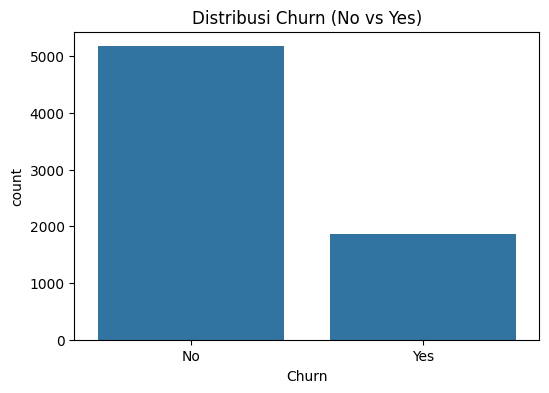

Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64

In [9]:
# Distribusi target
print(df['Churn'].value_counts())
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn')
plt.title('Distribusi Churn (No vs Yes)')
plt.show()

# Persentase
display(df['Churn'].value_counts(normalize=True).mul(100).round(2))


## Korelasi

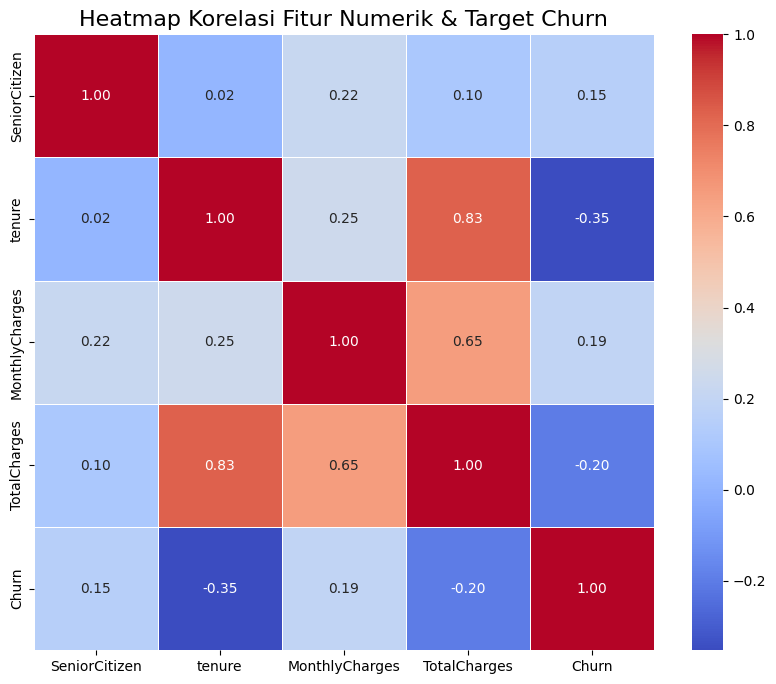

In [10]:
# Analisis korelasi
df_corr = df.copy()

# Encode target Churn menjadi angka (1 = Yes, 0 = No)
from sklearn.preprocessing import LabelEncoder
df_corr['Churn'] = LabelEncoder().fit_transform(df_corr['Churn'])

# Ambil hanya kolom numerik 
numeric_cols = df_corr.select_dtypes(include=['number'])

# Hitung matriks korelasi
corr_matrix = numeric_cols.corr()

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik & Target Churn', fontsize=16)
plt.show()

In [11]:
# Cek baris yang TotalCharges-nya NaN
rows_with_nan = df[df['TotalCharges'].isnull()]

print(f"Jumlah baris NaN: {len(rows_with_nan)}")
print("\nMenampilkan data tersebut (perhatikan kolom 'tenure'):")
display(rows_with_nan[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']])

Jumlah baris NaN: 11

Menampilkan data tersebut (perhatikan kolom 'tenure'):


,customerID,tenure,MonthlyCharges,TotalCharges
488,4472-LVYGI,0,52.55,NaN
753,3115-CZMZD,0,20.25,NaN
936,5709-LVOEQ,0,80.85,NaN
1082,4367-NUYAO,0,25.75,NaN
1340,1371-DWPAZ,0,56.05,NaN
3331,7644-OMVMY,0,19.85,NaN
3826,3213-VVOLG,0,25.35,NaN
4380,2520-SGTTA,0,20.00,NaN
5218,2923-ARZLG,0,19.70,NaN
6670,4075-WKNIU,0,73.35,NaN


## Handle Missing values

In [12]:
# Mengisi Missing Value dengan 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [13]:
# Verifikasi ulang
print(f"Sisa Missing Value di TotalCharges: {df['TotalCharges'].isnull().sum()}")

Sisa Missing Value di TotalCharges: 0


# Direct Modeling

## Data preparation

In [17]:
df_direct = df.copy()

# Drop customerID (karena tidak relevan untuk prediksi)
if 'customerID' in df_direct.columns:
    df_direct.drop('customerID', axis=1, inplace=True)

# Minimal Encoding
le = LabelEncoder()
for col in df_direct.columns:
    if df_direct[col].dtype == 'object':
        df_direct[col] = le.fit_transform(df_direct[col])

# Tetapkan X (Fitur) dan y (Target)
X_direct = df_direct.drop('Churn', axis=1)
y_direct = df_direct['Churn']

# Train-Test Split 
X_train, X_test, y_train, y_test = train_test_split(X_direct, y_direct, test_size=0.2, random_state=42)
print("Preparation ready")

Preparation ready


## Define model

In [19]:
# Konvensional: Logistic Regression
model_lr = LogisticRegression(max_iter=3000, random_state=42)

# Ensemble Bagging: Random Forest
model_rf = RandomForestClassifier(random_state=42)

# Ensemble Voting: Gabungan LR + KNN + SVM
clf1 = LogisticRegression(max_iter=3000, random_state=42)
clf2 = KNeighborsClassifier()
clf3 = SVC(probability=True, random_state=42)

model_voting = VotingClassifier(
    estimators=[('lr', clf1), ('knn', clf2), ('svm', clf3)],
    voting='hard'
)

models_direct = {
    "Logistic Regression": model_lr,
    "Random Forest": model_rf,
    "Voting Classifier": model_voting
}
print("Define model ready")

Define model ready


## Train & Evaluate

=== HASIL DIRECT MODELING ===

Model: Logistic Regression
  Accuracy : 0.8162
  Precision: 0.6792
  Recall   : 0.5791
  F1-Score : 0.6252


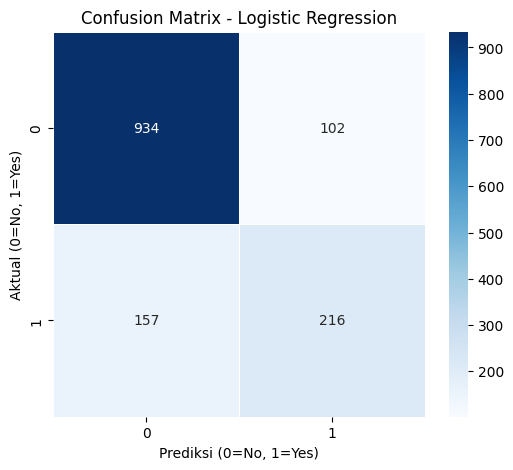


Model: Random Forest
  Accuracy : 0.7949
  Precision: 0.6567
  Recall   : 0.4718
  F1-Score : 0.5491


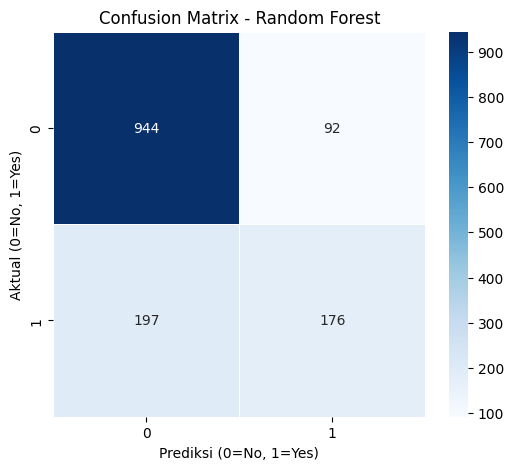


Model: Voting Classifier
  Accuracy : 0.7999
  Precision: 0.7459
  Recall   : 0.3700
  F1-Score : 0.4946


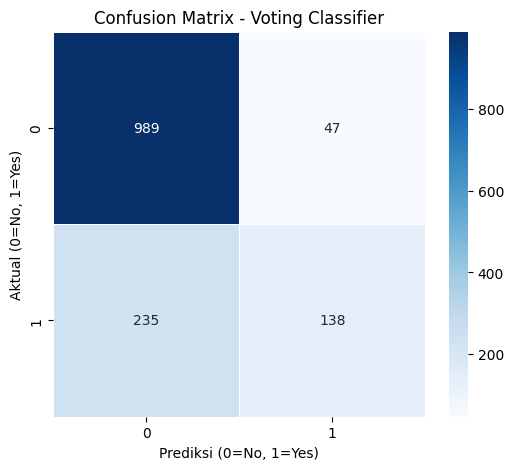

In [21]:
print("=== HASIL DIRECT MODELING ===")

for name, model in models_direct.items():
    # Training tanpa preprocessing lanjut
    model.fit(X_train, y_train)
    
    # Prediksi
    y_pred = model.predict(X_test)
    
    # Evaluasi Metrik
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\nModel: {name}")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall   : {rec:.4f}")
    print(f"  F1-Score : {f1:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
    
    # Kosmetik Grafik
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Prediksi (0=No, 1=Yes)')
    plt.ylabel('Aktual (0=No, 1=Yes)')
    plt.show()